Source: [VAROS - programação](https://www.youtube.com/watch?v=QSR0RCC3Mes&t=39s)

In [8]:
import math
from pandas_datareader import data as pdr
import yfinance as yfin
yfin.pdr_override()
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
from datetime import datetime
from datetime import timedelta
pd.options.mode.chained_assignment = None

In [57]:
import tensorflow as tf
input_shape = (4, 28, 28, 3)
print(tf.random.normal(input_shape))

tf.Tensor(
[[[[-0.69459444  0.36815372 -1.2693065 ]
   [-0.01119018  1.0146904  -0.46148384]
   [-0.72808826  1.3785715   0.65831834]
   ...
   [-0.73983246 -1.5553231   0.55632204]
   [ 1.0190257  -0.77625465 -0.7087601 ]
   [ 0.17578612 -0.63245356  0.62096393]]

  [[-2.2956579   0.19161701  1.2515996 ]
   [-0.02059049 -0.21617132  1.8405056 ]
   [-2.125768   -0.33055776 -1.5856875 ]
   ...
   [-0.52511543 -1.0719885   0.7573002 ]
   [-0.57612956  0.600361    0.9360508 ]
   [-0.1073428  -0.36573026  0.26658565]]

  [[-1.0516306  -1.3884021   0.31060874]
   [-1.9604231  -0.6369624  -0.03151917]
   [-0.09934725  1.0148846  -0.63976157]
   ...
   [-1.3485785  -1.487201    0.42075974]
   [-1.0005869  -0.6584391  -0.38966298]
   [ 0.6778566   1.6258419   0.7304615 ]]

  ...

  [[-0.08202174  0.83229566 -1.1659398 ]
   [-0.5261799  -0.08431382 -0.9829612 ]
   [-1.1224191  -0.45662472 -0.04880904]
   ...
   [-0.28940907  0.5903611  -0.45263812]
   [-0.88819474  1.3396903   0.40190256]
   [-

In [19]:
a = np.array([1,2,3,4,5,6,7,8])
a

array([1, 2, 3, 4, 5, 6, 7, 8])

In [20]:
a = np.array([1,2,3,4,5,6,7,8])
a = a.reshape(-1, 1)
a

array([[1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8]])

In [18]:
a = np.array([1,2,3,4,5,6,7,8])
a = a.reshape(-1, 1)
escalador = MinMaxScaler(feature_range=(0, 1))
escalador.fit_transform(a)

array([[0.        ],
       [0.14285714],
       [0.28571429],
       [0.42857143],
       [0.57142857],
       [0.71428571],
       [0.85714286],
       [1.        ]])

In [9]:
acao = 'MGLU3.SA'

inicio = '2014-12-31'
final = '2022-09-15'

dados_acao = pdr.get_data_yahoo(acao, inicio, final)

dados_acao

[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2015-01-02,0.243750,0.243750,0.231562,0.232812,0.215259,6323200
2015-01-05,0.235625,0.240625,0.229687,0.237187,0.219304,10326400
2015-01-06,0.238437,0.238437,0.233125,0.234062,0.216414,12572800
2015-01-07,0.237500,0.242187,0.234687,0.241875,0.223638,6454400
2015-01-08,0.239375,0.242187,0.237500,0.240000,0.221905,8393600
...,...,...,...,...,...,...
2022-09-08,4.060000,4.360000,4.040000,4.290000,4.290000,179911400
2022-09-09,4.420000,4.430000,4.300000,4.380000,4.380000,134934100
2022-09-12,4.440000,4.820000,4.430000,4.790000,4.790000,202900500


In [10]:
cotacao = dados_acao['Close'].to_numpy().reshape(-1, 1)

cotacao

array([[0.232812  ],
       [0.237187  ],
       [0.234062  ],
       ...,
       [4.78999996],
       [4.69999981],
       [4.46999979]])

In [11]:
tamanho_dados_treinamento = int(len(cotacao) * 0.8)

tamanho_dados_treinamento

1532

In [13]:
escalador = MinMaxScaler(feature_range=(0, 1))
dados_entre_0_e_1_treinamento = escalador.fit_transform(cotacao[0: tamanho_dados_treinamento, :])
dados_entre_0_e_1_teste = escalador.transform(cotacao[tamanho_dados_treinamento:, :])

dados_entre_0_e_1 = list(dados_entre_0_e_1_treinamento.reshape(
    len(dados_entre_0_e_1_treinamento)
)) + list(
    dados_entre_0_e_1_teste.reshape(len(dados_entre_0_e_1_teste))
)

dados_entre_0_e_1 = np.array(dados_entre_0_e_1).reshape(len(dados_entre_0_e_1), 1)
dados_entre_0_e_1

array([[0.00737532],
       [0.00753488],
       [0.00742091],
       ...,
       [0.17357828],
       [0.17029593],
       [0.16190771]])

In [39]:
dados_para_treinamento = dados_entre_0_e_1[0: tamanho_dados_treinamento, :]

treinamento_x = []
treinamento_y = []

for i in range(60, len(dados_para_treinamento)):
    # 60 ultimos dias
    treinamento_x.append(dados_para_treinamento[i - 60: i, 0])
    
    # cotação
    treinamento_y.append(dados_para_treinamento[i, 0])
    
    if i <= 61:
        print(treinamento_x)
        print('treinamento_Y')
        print(treinamento_y)



[array([0.00737532, 0.00753488, 0.00742091, 0.00770585, 0.00763747,
       0.00734115, 0.00743232, 0.00734115, 0.00720438, 0.00718159,
       0.00724997, 0.00720438, 0.00686247, 0.00691944, 0.00688527,
       0.00691944, 0.00686247, 0.00663453, 0.00641797, 0.0066915 ,
       0.00663453, 0.00668012, 0.006361  , 0.00628121, 0.00617865,
       0.00582532, 0.00575694, 0.00588233, 0.00549483, 0.0056088 ,
       0.00582532, 0.00585953, 0.00613306, 0.00612165, 0.00620145,
       0.00640659, 0.00622424, 0.0063838 , 0.00577974, 0.00581395,
       0.00558601, 0.00520988, 0.0051415 , 0.00495915, 0.00466283,
       0.00491356, 0.00486797, 0.00515292, 0.00487939, 0.00469704,
       0.00462865, 0.00457165, 0.00468562, 0.00470842, 0.00470842,
       0.00466283, 0.00458307, 0.00456027, 0.00452606, 0.00462865])]
treinamento_Y
[0.004685621274704243]
[array([0.00737532, 0.00753488, 0.00742091, 0.00770585, 0.00763747,
       0.00734115, 0.00743232, 0.00734115, 0.00720438, 0.00718159,
       0.00724997, 0.

In [40]:
treinamento_x = np.array(treinamento_x)
treinamento_y = np.array(treinamento_y)

print(treinamento_x)

print('Reshapping')
print(treinamento_x.shape[0])
print(treinamento_x.shape[1])


treinamento_x = treinamento_x.reshape(treinamento_x.shape[0], treinamento_x.shape[1], 1)
print(treinamento_x)

[[0.00737532 0.00753488 0.00742091 ... 0.00456027 0.00452606 0.00462865]
 [0.00753488 0.00742091 0.00770585 ... 0.00452606 0.00462865 0.00468562]
 [0.00742091 0.00770585 0.00763747 ... 0.00462865 0.00468562 0.00485659]
 ...
 [0.88110614 0.85156498 0.83332972 ... 0.87600022 0.88074142 0.89423547]
 [0.85156498 0.83332972 0.83952971 ... 0.88074142 0.89423547 0.88402378]
 [0.83332972 0.83952971 0.84864734 ... 0.89423547 0.88402378 0.91502372]]
Reshapping
1472
60
[[[0.00737532]
  [0.00753488]
  [0.00742091]
  ...
  [0.00456027]
  [0.00452606]
  [0.00462865]]

 [[0.00753488]
  [0.00742091]
  [0.00770585]
  ...
  [0.00452606]
  [0.00462865]
  [0.00468562]]

 [[0.00742091]
  [0.00770585]
  [0.00763747]
  ...
  [0.00462865]
  [0.00468562]
  [0.00485659]]

 ...

 [[0.88110614]
  [0.85156498]
  [0.83332972]
  ...
  [0.87600022]
  [0.88074142]
  [0.89423547]]

 [[0.85156498]
  [0.83332972]
  [0.83952971]
  ...
  [0.88074142]
  [0.89423547]
  [0.88402378]]

 [[0.83332972]
  [0.83952971]
  [0.848647

In [42]:
modelo = Sequential()

'''
vamos criar um modelo com 50 neurônios
return sequences = True pois vamos usar outro LSTM depois
definir o shape, que no caso são 60 informações para gerar uma
Adicionar mais neurônios com o dense, 25 e 1
Não se apegue a isso agora, é apenas uma arquitetura de deep learning
'''

modelo.add(LSTM(50, return_sequences=True, input_shape = (treinamento_x.shape[1], 1)))
modelo.add(LSTM(50, return_sequences=False))
modelo.add(Dense(25))
modelo.add(Dense(1))

treinamento_x.shape[1]

60

In [43]:
#copilando o modelo

# a função de loss é a forema de medir o erro do modelo, que nesse caso
# é o clássico erro médio quadrático da que é usado em regressão linear
# otimizador e medida de erro
modelo.compile(optimizer="adam", loss="mean_squared_error")

In [44]:
'''
agora com o modelo copilado e os dados, podemos treinar o modelo
batch size é depois de quantas em quantas amostras o modelo irá otimizar os parÂmetros
epochs é quantas vezes o algoritmo irá rodar os dados treinamento, aprendendo
'''
modelo.fit(treinamento_x, treinamento_y, batch_size=1, epochs=1)

1472/1472 [==============================] - 45s 28ms/step - loss: 0.0018


In [45]:
# criar dados de teste
dados_teste = dados_entre_0_e_1[tamanho_dados_treinamento - 60:, :]

teste_x = []
teste_y = cotacao[tamanho_dados_treinamento: , :]

for i in range(60, len(dados_teste)):
    teste_x.append(dados_teste[i - 60: i, 0])
    

In [47]:
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

In [48]:
predicoes = modelo.predict(teste_x)

predicoes = escalador.inverse_transform(predicoes)

predicoes

array([[7.106441 ],
       [7.123504 ],
       [7.09692  ],
       [7.058815 ],
       [7.04928  ],
       [7.051342 ],
       [7.05467  ],
       [7.040822 ],
       [7.0294275],
       [7.0152683],
       [6.9662943],
       [6.90589  ],
       [6.8366847],
       [6.7609844],
       [6.664855 ],
       [6.566293 ],
       [6.468216 ],
       [6.3722396],
       [6.2947755],
       [6.237103 ],
       [6.198925 ],
       [6.173664 ],
       [6.1612425],
       [6.14745  ],
       [6.170216 ],
       [6.2044325],
       [6.2414837],
       [6.288451 ],
       [6.334096 ],
       [6.376808 ],
       [6.4081407],
       [6.4253306],
       [6.4328384],
       [6.4250994],
       [6.422917 ],
       [6.4227242],
       [6.407507 ],
       [6.38026  ],
       [6.341086 ],
       [6.2945952],
       [6.251747 ],
       [6.2051964],
       [6.1644406],
       [6.120691 ],
       [6.088833 ],
       [6.0507574],
       [6.0160313],
       [5.9702835],
       [5.9350004],
       [5.9081087],


In [49]:
rmse = np.sqrt(np.mean(predicoes - teste_y) ** 2)
rmse

7.504803685544365

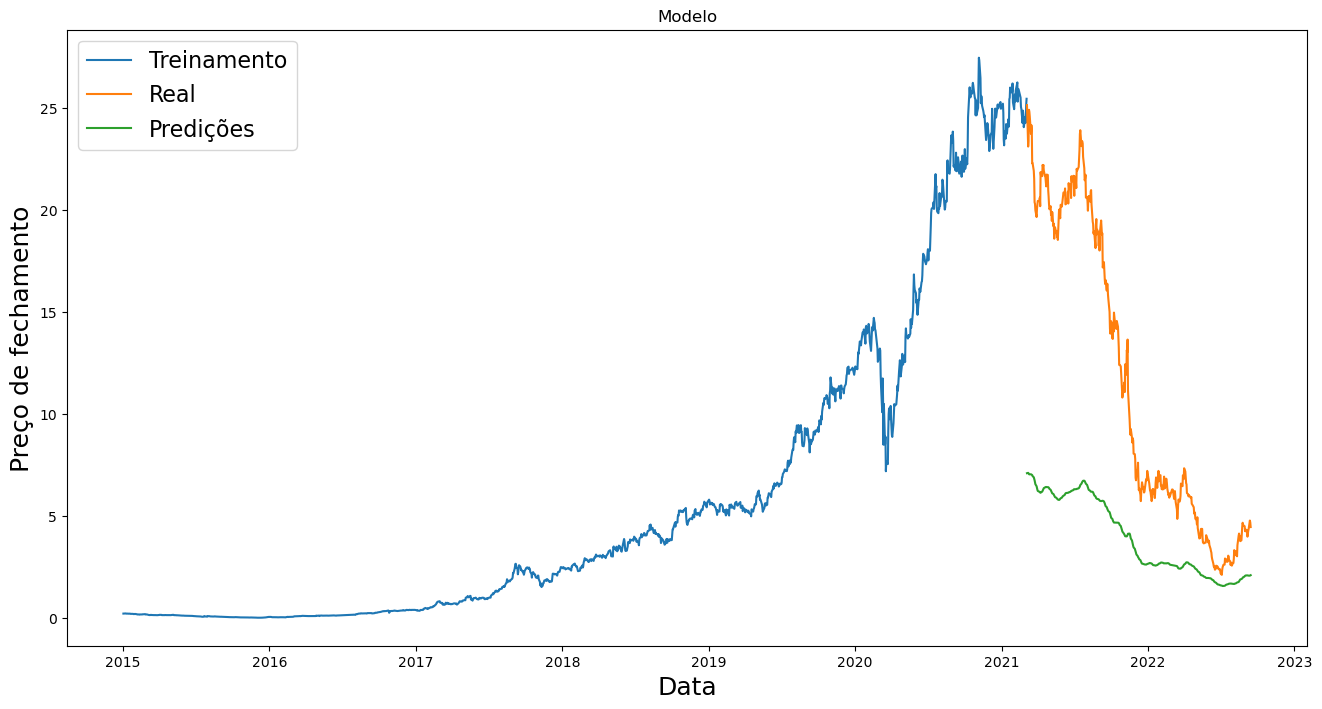

In [50]:
treinamento = dados_acao.iloc[:tamanho_dados_treinamento, :]
df_teste = pd.DataFrame({'Close': dados_acao['Close'].iloc[tamanho_dados_treinamento:],
                         'predicoes': predicoes.reshape(len(predicoes))})

plt.figure(figsize = (16, 8))
plt.title('Modelo')
plt.xlabel('Data', fontsize = 18)
plt.ylabel('Preço de fechamento', fontsize = 18)
plt.plot(treinamento['Close'])
plt.plot(df_teste[['Close', 'predicoes']])
plt.legend(['Treinamento', 'Real', 'Predições'], loc=2, prop={'size': 16})
plt.show()



In [51]:
df_teste[['Close', 'predicoes']]

,Close,predicoes
Date,,
2021-03-05,25.129999,7.106441
2021-03-08,23.100000,7.123504
2021-03-09,23.389999,7.096920
2021-03-10,24.900000,7.058815
2021-03-11,24.799999,7.049280
...,...,...
2022-09-08,4.290000,2.096041
2022-09-09,4.380000,2.091424
2022-09-12,4.790000,2.090495


In [53]:
# o preço é legal, mas o importante é acertar pra qual mercado o lado vai. Será que isso foi feito?

# calcular media de acertos e expectativa de lucro

df_teste['variacao_percentual_acao'] = df_teste['Close'].pct_change()
df_teste['variacao_percentual_modelo'] = df_teste['predicoes'].pct_change()

df_teste = df_teste.dropna()

df_teste['var_acao_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_acao'] > 0, True, False)

df_teste['var_modelo_maior_menor_que_zero'] = np.where(df_teste['variacao_percentual_modelo'] > 0, True, False)

df_teste['acertou_o_lado'] = np.where(df_teste['var_acao_maior_menor_que_zero'] == df_teste['var_modelo_maior_menor_que_zero'], True, False)

df_teste['variacao_percentual_acao_abs'] = df_teste['variacao_percentual_acao'].abs()

df_teste

,Close,predicoes,variacao_percentual_acao,variacao_percentual_modelo,var_acao_maior_menor_que_zero,var_modelo_maior_menor_que_zero,acertou_o_lado,variacao_percentual_acao_abs
Date,,,,,,,,
2021-03-08,23.100000,7.123504,-0.080780,0.002401,False,True,False,0.080780
2021-03-09,23.389999,7.096920,0.012554,-0.003732,True,False,False,0.012554
2021-03-10,24.900000,7.058815,0.064558,-0.005369,True,False,False,0.064558
2021-03-11,24.799999,7.049280,-0.004016,-0.001351,False,False,True,0.004016
2021-03-12,24.570000,7.051342,-0.009274,0.000293,False,True,False,0.009274
...,...,...,...,...,...,...,...,...
2022-09-08,4.290000,2.096041,0.072500,-0.003391,True,False,False,0.072500
2022-09-09,4.380000,2.091424,0.020979,-0.002203,True,False,False,0.020979
2022-09-12,4.790000,2.090495,0.093607,-0.000444,True,False,False,0.093607


In [54]:
acertou_lado = df_teste['acertou_o_lado'].sum()/len(df_teste['acertou_o_lado'])
errou_lado = 1 - acertou_lado
media_lucro = df_teste.groupby('acertou_o_lado')['variacao_percentual_acao_abs'].mean()
exp_mat_lucro = acertou_lado * media_lucro[1] - media_lucro[0] * errou_lado
ganho_sobre_perda = media_lucro[1]/media_lucro[0]
print(media_lucro)
print(ganho_sobre_perda)
print(acertou_lado)
print(exp_mat_lucro * 100)

acertou_o_lado
False    0.033177
True     0.034097
Name: variacao_percentual_acao_abs, dtype: float64
1.0277497352527603
0.5157068062827225
0.1516986074208415


In [56]:
# criando um código que você passa 60 dias e ele devolve a cotação
# resumindo: vamos descobrir o preço da petrobras de hoje/amanhã com esse modelo

data_hoje = datetime.now()

#se quiser escolher um dia, basta fazer assim
# data_hoje = datetime.now() - timedelta(days = 1)

if data_hoje.hour > 18:
    final = data_hoje
    inicial = datetime.now() - timedelta(days = 252)
else:
    final = data_hoje - timedelta(days = 1)
    inicial = datetime.now() - timedelta(days = 252)

# Não coloque outra ação aqui!!! (Não treine um modelo diferente e então tente prever a ação de outra empresa)
cotacoes = pdr.get_data_yahoo(acao, inicial, final)
ultimos_60_dias = cotacoes['Close'].iloc[-60:].values.reshape(-1, 1)

ultimos_60_dias_escalado = escalador.transform(ultimos_60_dias)

teste_x = []
teste_x.append(ultimos_60_dias_escalado)
teste_x = np.array(teste_x)
teste_x = teste_x.reshape(teste_x.shape[0], teste_x.shape[1], 1)

previsao_de_preco = modelo.predict(teste_x)
previsao_de_preco = escalador.inverse_transform(previsao_de_preco)
print(previsao_de_preco)

[*********************100%***********************]  1 of 1 completed
[[3.3676867]]


# Sugestões:

- Melhorar as estatísticas de avaliação (dias seguidos ganhando, max DD etc)
- Rodar pra todas as ações do ibovespa e criar uma expectativa matemática da expectativa matemática. Isso vai deixar o resultado final ainda mais robusto, definindo a alocação do $ baseado na liquidez